In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

import genetic_algo

from argosim import antenna_utils, imaging_utils, metrics_utils, plot_utils
from pathlib import Path

from genetic_algo import run_optimization


In [41]:
import importlib, genetic_algo
importlib.reload(genetic_algo)



# Parameters 
n_generations = 100
n_antennas = 30
space_size = 4000
mutation_rate = 1
n_mutations = 40
d_min = 10.0
sigma = 20 * d_min   
fov_size = (0.03, 0.03)
im_size = (128, 128)

# Circular 
init_circ = antenna_utils.circular_antenna_arr(n_antennas, 2000)

case_name = "Circular"

# Run the 3 cases
res, best_cfg, history = script.run_optimization(
    case_name=case_name,
    init_config=init_circ,              
    n_generations=n_generations,
    n_mutations=n_mutations,
    mutation_rate=mutation_rate,
    d_min=d_min,
    sigma=sigma,
    w_sll=1.0, w_fwhm=0.1, w_ecc=0.5
)

#pd.DataFrame([res]).set_index("Case")

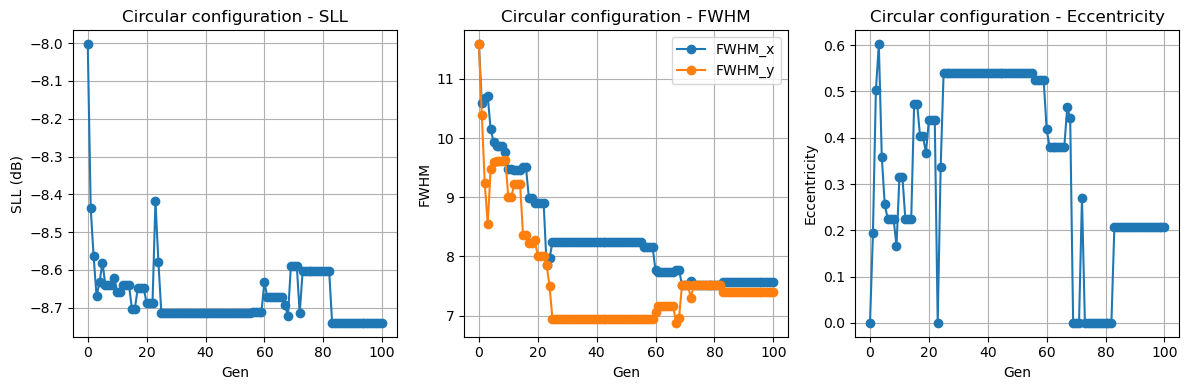

In [42]:
# Plots (SLL, FWHM, Eccentricity) 
gens = range(len(history["sll"]))

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.plot(gens, history["sll"], marker='o')
plt.title(f"{case_name} configuration - SLL"); plt.xlabel("Gen"); plt.ylabel("SLL (dB)"); plt.grid(True)

plt.subplot(1,3,2)
plt.plot(gens, history["fwhm_x"], marker='o', label="FWHM_x")
plt.plot(gens, history["fwhm_y"], marker='o', label="FWHM_y")
plt.title(f"{case_name} configuration - FWHM"); plt.xlabel("Gen"); plt.ylabel("FWHM"); plt.legend(); plt.grid(True)

plt.subplot(1,3,3)
plt.plot(gens, history["ecc"], marker='o')
plt.title(f"{case_name} configuration - Eccentricity"); plt.xlabel("Gen"); plt.ylabel("Eccentricity"); plt.grid(True)

plt.tight_layout(); plt.show()


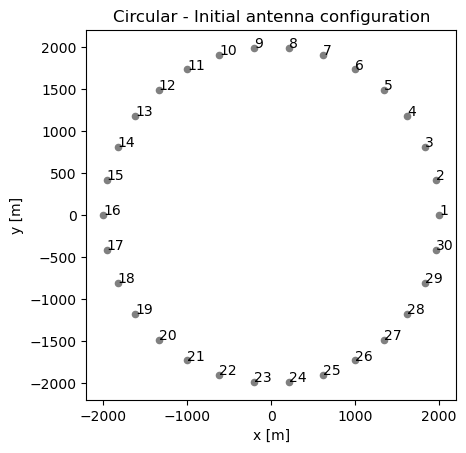

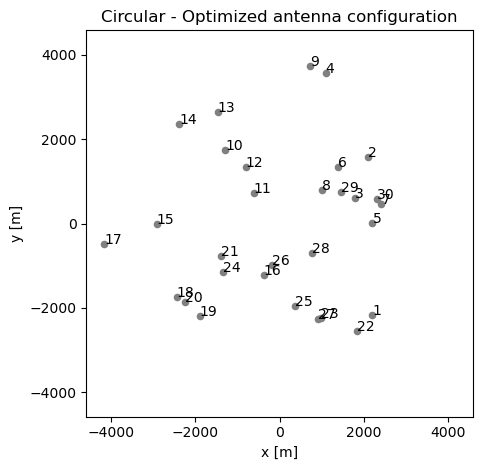

In [43]:
# Initial configuration

plot_utils.plot_antenna_arr(init_circ, title=f"{case_name} - Initial antenna configuration")

# Optimized configuration

plot_utils.plot_antenna_arr(best_cfg, title=f"{case_name} - Optimized antenna configuration")
plt.tight_layout(); plt.show()



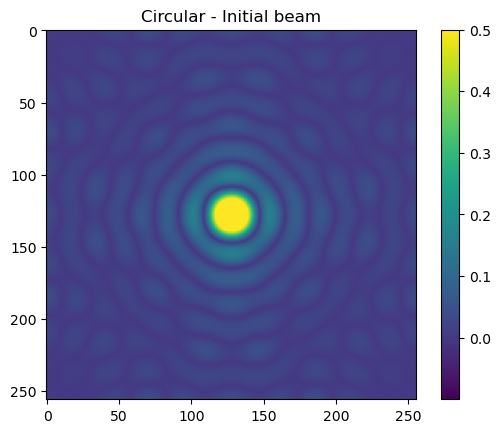

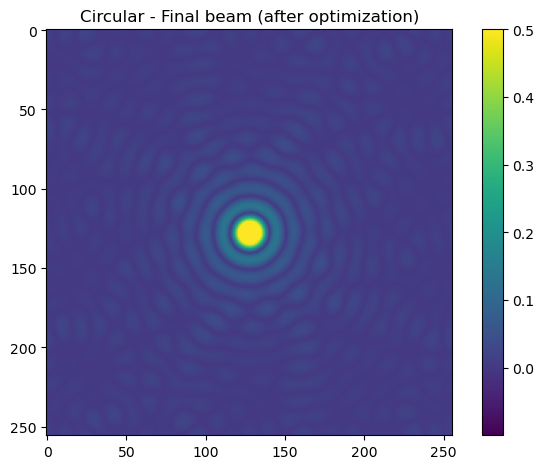

In [44]:
# Beams (initial vs final) 
score_i, beam_initial, _, _ = script.objective(init_circ)
score_f, beam_final,   _, _ = script.objective(best_cfg)

beam_initial = np.fft.fftshift(beam_initial)
beam_final   = np.fft.fftshift(beam_final)

plot_utils.plot_beam(beam_initial)
plt.title(f"{case_name} - Initial beam")

plot_utils.plot_beam(beam_final)
plt.title(f"{case_name} - Final beam (after optimization)")

plt.tight_layout()
plt.show()
